<a href="https://colab.research.google.com/github/ujjwalbasnyat/penguins_data_visualization/blob/main/penguins_data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Column Name
1. species
2. island
3. bill_Length_mm
4. bill_depth_mm
5. flipper_length_mm
6. body_mass_g
7. sex



# Data Wrangling

In [5]:
penguin_df = sns.load_dataset('penguins')

In [6]:
penguin_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [7]:
penguin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [8]:
penguin_df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [9]:
penguin_df['sex'].fillna(penguin_df['sex'].mode()[0], inplace= True)
penguin_df['sex'].nunique()

<ipython-input-9-43b2e99f1d3a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  penguin_df['sex'].fillna(penguin_df['sex'].mode()[0], inplace= True)


2

In [10]:
penguin_df['bill_length_mm'].fillna(penguin_df['bill_length_mm'].mean(), inplace=True)
penguin_df['bill_depth_mm'].fillna(penguin_df['bill_depth_mm'].mean(), inplace=True)
penguin_df['flipper_length_mm'].fillna(penguin_df['flipper_length_mm'].mean(), inplace=True)

<ipython-input-10-dd4caa798547>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  penguin_df['bill_length_mm'].fillna(penguin_df['bill_length_mm'].mean(), inplace=True)
<ipython-input-10-dd4caa798547>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].

In [11]:
penguin_df['sex'].value_counts()

,count
sex,
Male,179
Female,165


In [12]:
groupby_species = penguin_df.groupby('species')

In [13]:
groupby_species['island'].count()

,island
species,
Adelie,152
Chinstrap,68
Gentoo,124


In [14]:
# one-hot encoding for the sex column
df_encoded = pd.get_dummies(penguin_df, columns=['sex'], drop_first=True)

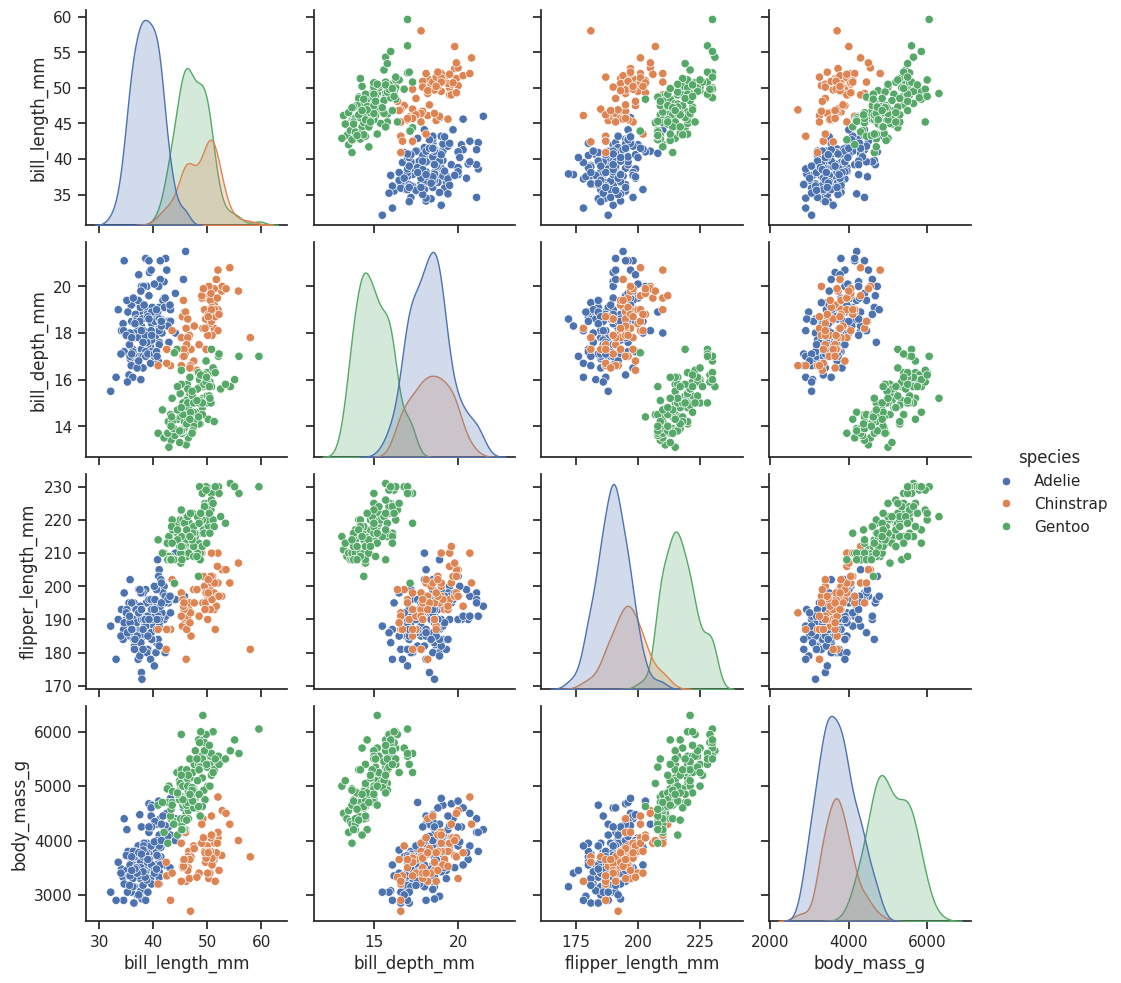

In [15]:
sns.set_theme(style='ticks')
sns.pairplot(penguin_df, hue='species', height=2.5, aspect=1)

# Multivariate Analysis

<Axes: >

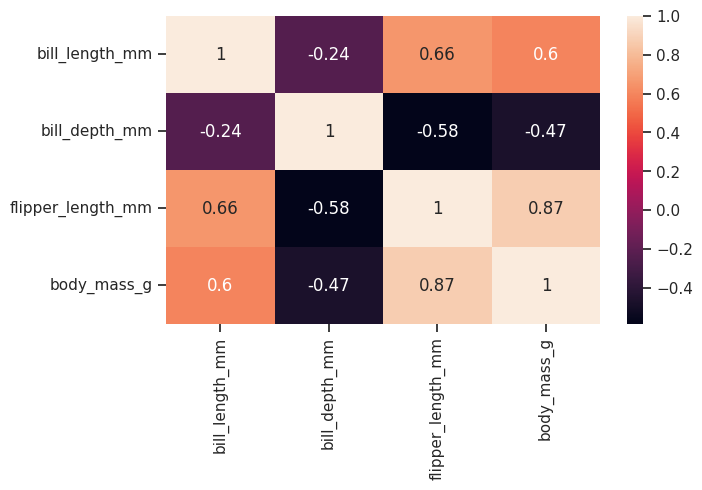

In [16]:
df_numeric = penguin_df.select_dtypes(include=['float'])
corr = df_numeric.corr()
plt.figure(figsize=(7,4))
sns.heatmap(corr, annot=True)

# Major observation from the heatmap
*   Among Three species, mean_flipper_length for the gentoo is highest.
*   There is high correlation between flipper_length and mass so, flipper length increses with increase in body mass.
*   



In [17]:
mean_flipper_length = groupby_species['flipper_length_mm'].agg('mean')
mean_flipper_length_df = mean_flipper_length.reset_index()

<Axes: xlabel='species', ylabel='flipper_length_mm'>

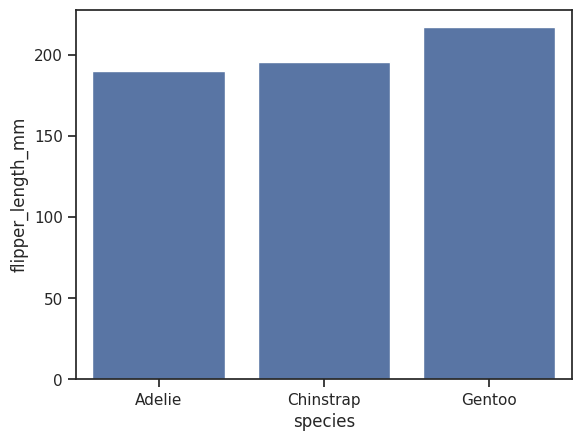

In [18]:

sns.barplot(data=mean_flipper_length_df, x= 'species', y='flipper_length_mm')

<Axes: xlabel='species', ylabel='flipper_length_mm'>

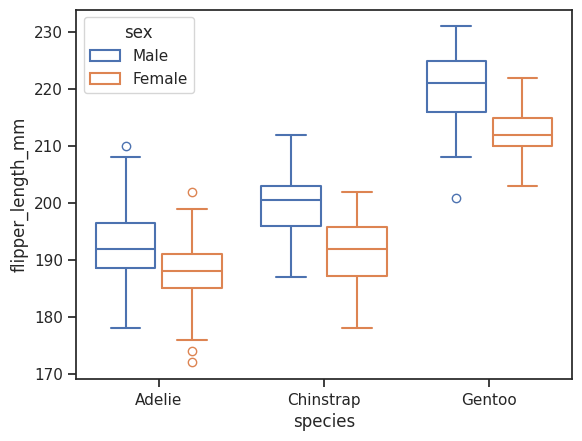

In [24]:
# species vs flipper_length hue = sex
sns.boxplot(data=penguin_df, x='species', y='flipper_length_mm', hue='sex', fill=False, gap=.1)

# Key Observation from the boxplot
1. Gentoo species has the longer flipper length and Adelie has short.
2. In all three species, males generally have longer flipper length.
3. Medain length is higher for males than females accros all species.

# Bivariate Analysis

<Axes: xlabel='body_mass_g', ylabel='flipper_length_mm'>

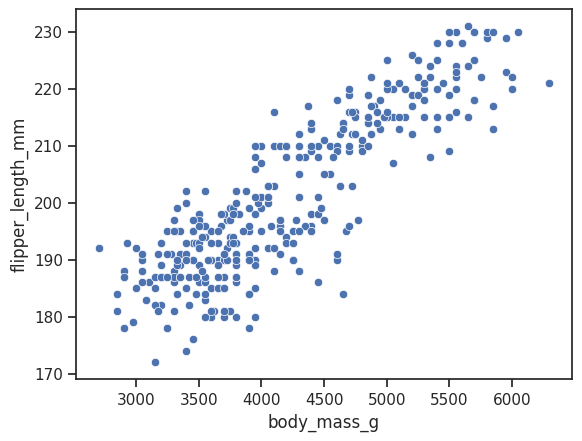

In [20]:
# Scatterplot mass vs flipper length
sns.scatterplot(penguin_df, x='body_mass_g', y='flipper_length_mm')

In [21]:
groupby_sex = penguin_df.groupby('sex').agg('count')
groupby_sex['species']

,species
sex,
Female,165
Male,179


#Key Finding
1.  

# Univariate Analysis

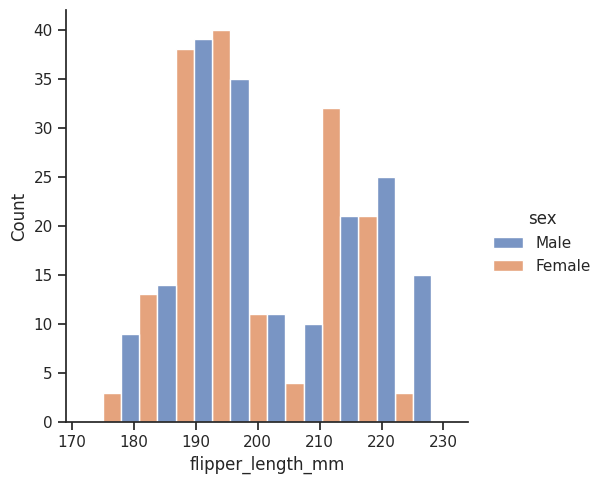

In [22]:
# Distplot of Flipper length
sns.displot(penguin_df, x ='flipper_length_mm', hue='sex', multiple='dodge')

<Axes: xlabel='body_mass_g', ylabel='Count'>

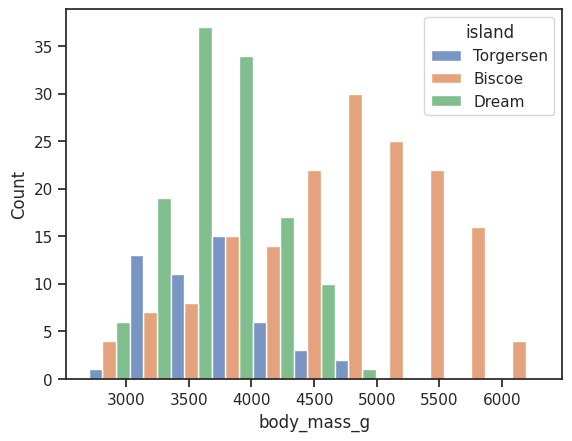

In [23]:
# Distplot of island length
sns.histplot(penguin_df, x ='body_mass_g', hue='island', multiple='dodge')

**Major findings**
1.   
2.   
3.  

